In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings

warnings.filterwarnings(action='ignore')

# 1. covid-19 데이터 얻기

- data source
    - https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook#Worldwide-Overview
        - confirmed_df
        - latest_df


## 1-1. confirmed_df, latest_df 데이터 확인

In [2]:
# csv파일로 저장하여 확인
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df.to_csv('../data/world.csv')

In [3]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 638 entries, Province/State to 10/16/21
dtypes: float64(2), int64(634), object(2)
memory usage: 1.4+ MB


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789


In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-06-2021.csv')
latest_data.to_csv('../data/world_2.csv')

In [6]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3832 non-null   object 
 3   Country_Region       4005 non-null   object 
 4   Last_Update          4005 non-null   object 
 5   Lat                  3915 non-null   float64
 6   Long_                3915 non-null   float64
 7   Confirmed            4005 non-null   int64  
 8   Deaths               4005 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4005 non-null   object 
 12  Incident_Rate        3914 non-null   float64
 13  Case_Fatality_Ratio  3964 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.2+ KB


In [7]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-10-07 04:21:36,33.93911,67.709953,155380,7220,NaN,NaN,Afghanistan,399.143647,4.646673
1,NaN,NaN,NaN,Albania,2021-10-07 04:21:36,41.15330,20.168300,173190,2734,NaN,NaN,Albania,6018.138856,1.578613
2,NaN,NaN,NaN,Algeria,2021-10-07 04:21:36,28.03390,1.659600,204171,5838,NaN,NaN,Algeria,465.601240,2.859368
3,NaN,NaN,NaN,Andorra,2021-10-07 04:21:36,42.50630,1.521800,15284,130,NaN,NaN,Andorra,19781.272245,0.850563
4,NaN,NaN,NaN,Angola,2021-10-07 04:21:36,-11.20270,17.873900,60448,1598,NaN,NaN,Angola,183.921095,2.643594


In [8]:
len(latest_data[latest_data['Country_Region']=='US'])

3279

```
- confirmed_df => 위도, 경도, 데일리 누적확진자 수 필요
    - 나라(지역별) : 278개(한 나라에서 연방, 지역 세분화된 곳 있음.)
    - 나라(지역별) 위도, 경도 
    - 나라(지역별) 20.1.22 ~ 21.10.11 까지 누적확진자 수 날짜별 기록 

- latest_data => 총 확진자수, 사망자 수 가져올 것임.
    - confirmed_df 보다 나라 별 지역 세분화
    - 나라(지역별) : 4004개(그 중 미국만 3279개)
    - 나라(지역별) 총 누적확진자 수, 사망자 수
    - 나라(지역별) 총 누적확진자 대비 사망자율
```


--------------------------------

# 2. 우리나라와 비교할 4개 국가 선정 및 데이터 가공

## 2-1. 4개 나라 선정 
- https://coronaboard.kr/    -> 국가별 코로나 확진자 수 트렌드 로그 스케일 비교
- https://namu.wiki/w/%EA%B5%AD%EA%B0%80%EB%B3%84%201%EC%9D%B8%EB%8B%B9%20GDP%20%EC%88%9C%EC%9C%84(%EB%AA%85%EB%AA%A9) -> 국가별 GDP, 인구수 고려
- https://overseas.mofa.go.kr/sg-ko/brd/m_2524/list.do -> 싱가포르와 국가 간 여행 입국 절차 간소화
    
    => 한국, 미국, 이탈리아, 싱가포르, 일본 선정

## 2-1. 데이터 가공
- confirmed_df, latest_data를 5개 국가 데이터만 남도록 가공

In [9]:

kor = confirmed_df[confirmed_df['Country/Region'] =='Korea, South']
ital = confirmed_df[confirmed_df['Country/Region'] =='Italy']
jap = confirmed_df[confirmed_df['Country/Region'] =='Japan']
sing = confirmed_df[confirmed_df['Country/Region'] =='Singapore']
us = confirmed_df[confirmed_df['Country/Region'] =='US']

target = [kor, ital, jap, sing, us]
five_country_raw = pd.concat(target)
five_country_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
155,NaN,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
230,NaN,Singapore,1.283300,103.833300,0,1,3,3,4,5,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
254,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


In [10]:
del five_country_raw['Province/State']

In [11]:
five_country_raw.reset_index(inplace=True)
five_country_raw


,index,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,160,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
1,153,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
2,155,Japan,36.204824,138.252924,2,2,2,2,4,4,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
3,230,Singapore,1.283300,103.833300,0,1,3,3,4,5,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
4,254,US,40.000000,-100.000000,1,1,2,2,5,5,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


In [12]:
del five_country_raw['index']
five_country_raw

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
1,Italy,41.871940,12.567380,0,0,0,0,0,0,0,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
2,Japan,36.204824,138.252924,2,2,2,2,4,4,7,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
3,Singapore,1.283300,103.833300,0,1,3,3,4,5,7,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
4,US,40.000000,-100.000000,1,1,2,2,5,5,5,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


In [14]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-10-07 04:21:36,33.939110,67.709953,155380,7220,NaN,NaN,Afghanistan,399.143647,4.646673
1,NaN,NaN,NaN,Albania,2021-10-07 04:21:36,41.153300,20.168300,173190,2734,NaN,NaN,Albania,6018.138856,1.578613
2,NaN,NaN,NaN,Algeria,2021-10-07 04:21:36,28.033900,1.659600,204171,5838,NaN,NaN,Algeria,465.601240,2.859368
3,NaN,NaN,NaN,Andorra,2021-10-07 04:21:36,42.506300,1.521800,15284,130,NaN,NaN,Andorra,19781.272245,0.850563
4,NaN,NaN,NaN,Angola,2021-10-07 04:21:36,-11.202700,17.873900,60448,1598,NaN,NaN,Angola,183.921095,2.643594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,NaN,NaN,NaN,Vietnam,2021-10-07 04:21:36,14.058324,108.277199,822687,20098,NaN,NaN,Vietnam,845.180785,2.442970
4001,NaN,NaN,NaN,West Bank and Gaza,2021-10-07 04:21:36,31.952200,35.233200,439845,4438,NaN,NaN,West Bank and Gaza,8622.017887,1.008992
4002,NaN,NaN,NaN,Yemen,2021-10-07 04:21:36,15.552727,48.516388,9271,1763,NaN,NaN,Yemen,31.083652,19.016287
4003,NaN,NaN,NaN,Zambia,2021-10-07 04:21:36,-13.133897,27.849332,209248,3652,NaN,NaN,Zambia,1138.209861,1.745297


In [15]:
us = latest_data[latest_data['Country_Region'] =='US']
us = pd.pivot_table(us, index='Country_Region', values=['Deaths','Confirmed'], aggfunc=np.sum)
us

,Confirmed,Deaths
Country_Region,,
US,44058827,708110


In [16]:
kor = latest_data[latest_data['Country_Region'] =='Korea, South']
kor = pd.pivot_table(kor, index='Country_Region', values=['Deaths','Confirmed'], aggfunc=np.sum)
kor

,Confirmed,Deaths
Country_Region,,
"Korea, South",325804,2544


In [17]:
jap = latest_data[latest_data['Country_Region'] =='Japan']
jap = pd.pivot_table(jap, index='Country_Region', values=['Deaths','Confirmed'], aggfunc=np.sum)
jap

,Confirmed,Deaths
Country_Region,,
Japan,1708634,17833


In [18]:
sing = latest_data[latest_data['Country_Region'] =='Singapore']
sing = pd.pivot_table(sing, index='Country_Region', values=['Deaths','Confirmed'], aggfunc=np.sum)
sing

,Confirmed,Deaths
Country_Region,,
Singapore,113381,133


In [19]:
ital = latest_data[latest_data['Country_Region'] =='Italy']
ital = pd.pivot_table(ital, index='Country_Region', values=['Deaths','Confirmed'], aggfunc=np.sum)
ital

,Confirmed,Deaths
Country_Region,,
Italy,4689341,131157


In [20]:
five_country_count = pd.concat([kor, ital, jap, sing, us])
five_country_count.rename(columns={'Country_Region':'Country/Region'}, inplace=True)
five_country_count.reset_index(inplace=True)
five_country_count


,Country_Region,Confirmed,Deaths
0,"Korea, South",325804,2544
1,Italy,4689341,131157
2,Japan,1708634,17833
3,Singapore,113381,133
4,US,44058827,708110


In [21]:

five_country_raw['Confirmed']=five_country_count['Confirmed']
five_country_raw['Deaths']=five_country_count['Deaths']
five_country_raw



,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,Confirmed,Deaths
0,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,...,331519,332816,334163,335742,337679,339361,340978,342396,325804,2544
1,Italy,41.871940,12.567380,0,0,0,0,0,0,0,...,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464,4689341,131157
2,Japan,36.204824,138.252924,2,2,2,2,4,4,7,...,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059,1708634,17833
3,Singapore,1.283300,103.833300,0,1,3,3,4,5,7,...,124157,126966,129229,132205,135395,138327,141772,145120,113381,133
4,US,40.000000,-100.000000,1,1,2,2,5,5,5,...,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423,44058827,708110


In [22]:
five_country_raw.to_csv('../data/five_counrty_raw.csv')

In [23]:
five_country = pd.read_csv('../data/five_counrty_raw.csv', index_col=0)
five_country

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,Confirmed,Deaths
0,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,...,331519,332816,334163,335742,337679,339361,340978,342396,325804,2544
1,Italy,41.871940,12.567380,0,0,0,0,0,0,0,...,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464,4689341,131157
2,Japan,36.204824,138.252924,2,2,2,2,4,4,7,...,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059,1708634,17833
3,Singapore,1.283300,103.833300,0,1,3,3,4,5,7,...,124157,126966,129229,132205,135395,138327,141772,145120,113381,133
4,US,40.000000,-100.000000,1,1,2,2,5,5,5,...,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423,44058827,708110


-------------

# 3.  5개 나라 데이터 시각화

- 목표
    - 나라별 일일 누적 확진자 수 그래프

## 3-1. 나라별 일일 누적 확진자 수 그래프

In [24]:
len(five_country.columns)

639

In [26]:
five_country_daily = five_country.iloc[:, 3:-2]
five_country_daily

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,1,1,2,2,3,4,4,4,4,11,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
1,0,0,0,0,0,0,0,0,0,2,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
2,2,2,2,2,4,4,7,7,11,15,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
3,0,1,3,3,4,5,7,7,10,13,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
4,1,1,2,2,5,5,5,6,6,8,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


In [28]:
# korea daily graph_ x, y

x_kor = []
for i in range(len(five_country_daily.columns)): 
    x_kor.append(i)
y_kor = []
for i in range(len(x_kor)):
    y_kor.append(five_country_daily.iloc[0, i])
len(x_kor)
len(y_kor)

634

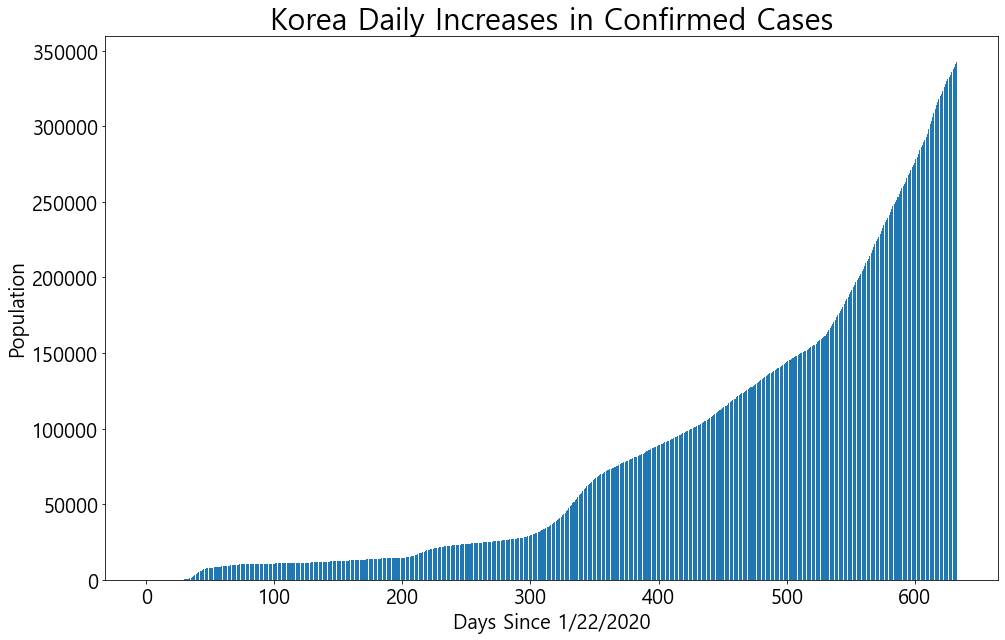

In [29]:

# 한국 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_kor,y_kor)
plt.title('Korea Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [30]:
# Italy daily graph_ x, y

x_ital = []
for i in range(len(five_country_daily.columns)): 
    x_ital.append(i)
y_ital = []
for i in range(len(x_ital)):
    y_ital.append(five_country_daily.iloc[1, i])
len(x_ital)
len(y_ital)

634

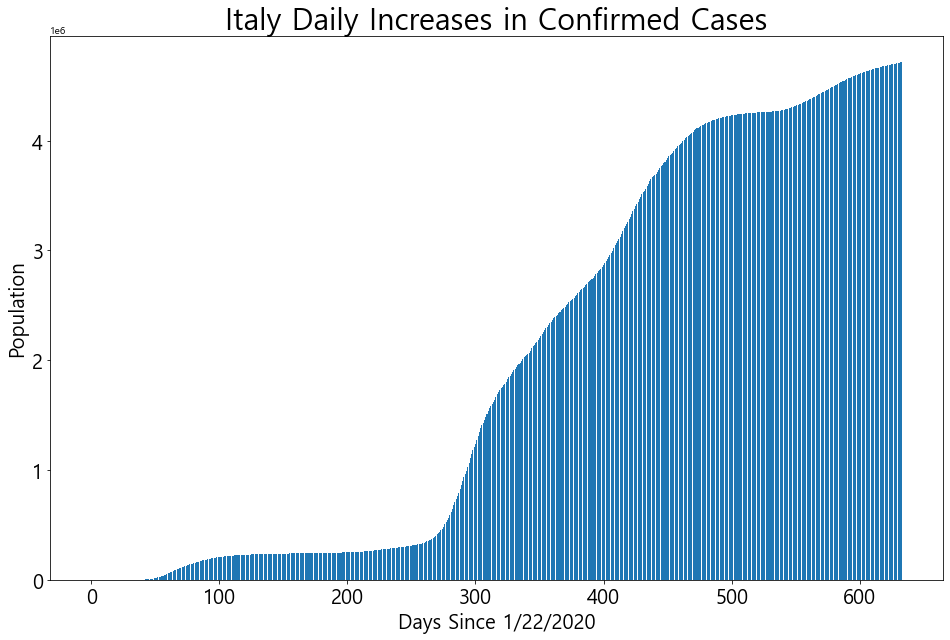

In [31]:

# 이탈리아 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_ital, y_ital)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [32]:
# Japan daily graph_ x, y

x_jap = []
for i in range(len(five_country_daily.columns)): 
    x_jap.append(i)
y_jap = []
for i in range(len(x_jap)):
    y_jap.append(five_country_daily.iloc[2, i])
len(x_jap)
len(y_jap)

634

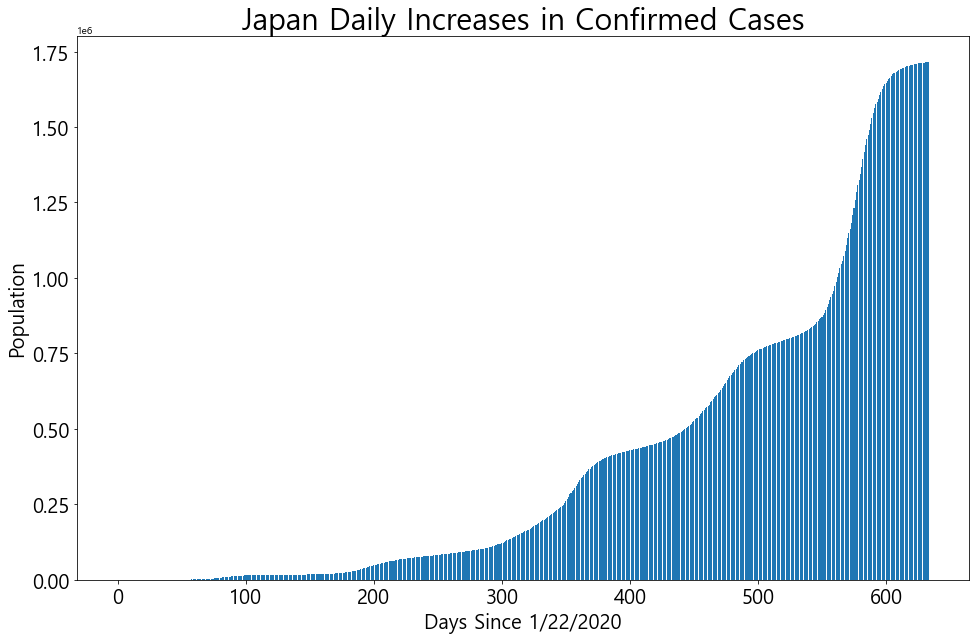

In [33]:

# 일본 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_jap,y_jap)
plt.title('Japan Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [34]:
# Singapore daily graph_ x, y

x_sing = []
for i in range(len(five_country_daily.columns)): 
    x_sing.append(i)
y_sing = []
for i in range(len(x_sing)):
    y_sing.append(five_country_daily.iloc[3, i])
len(x_sing)
len(y_sing)

634

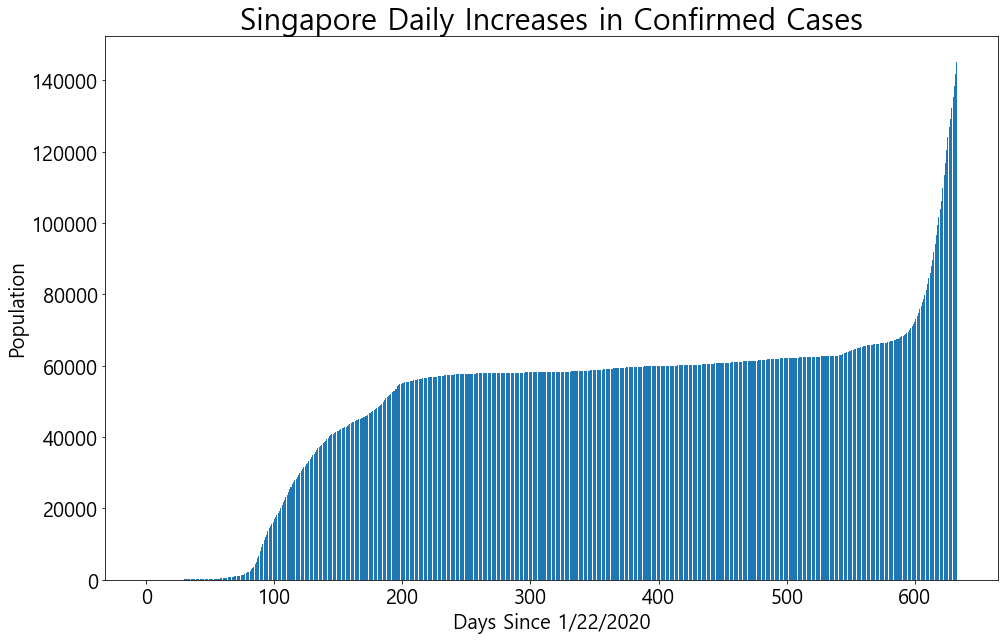

In [35]:

# 싱가포르 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_sing,y_sing)
plt.title('Singapore Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [36]:
# US daily graph_ x, y

x_us = []
for i in range(len(five_country_daily.columns)): 
    x_us.append(i)
y_us = []
for i in range(len(x_us)):
    y_us.append(five_country_daily.iloc[4, i])
len(x_us)
len(y_us)

634

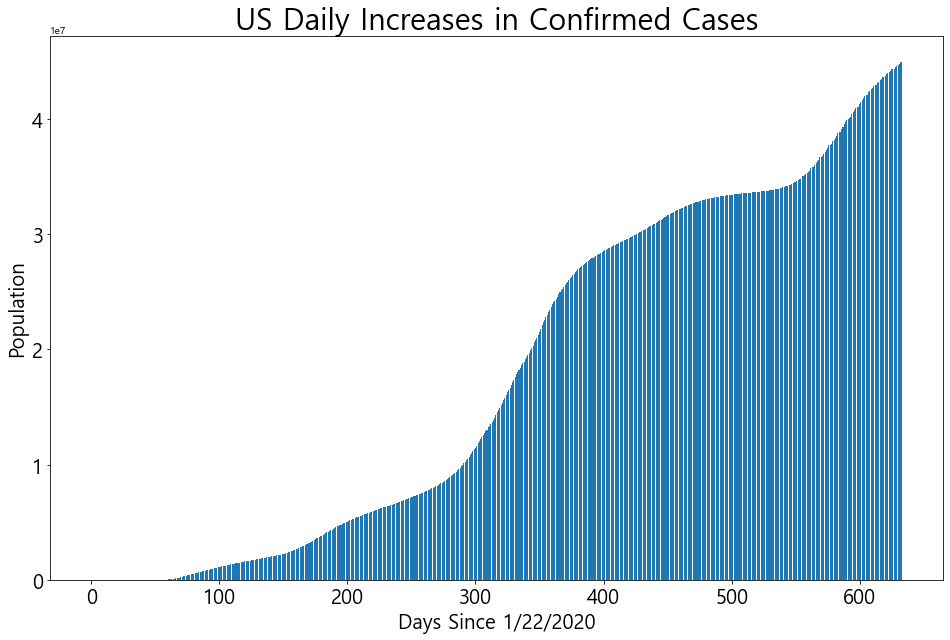

In [37]:

# 미국 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_us,y_us)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

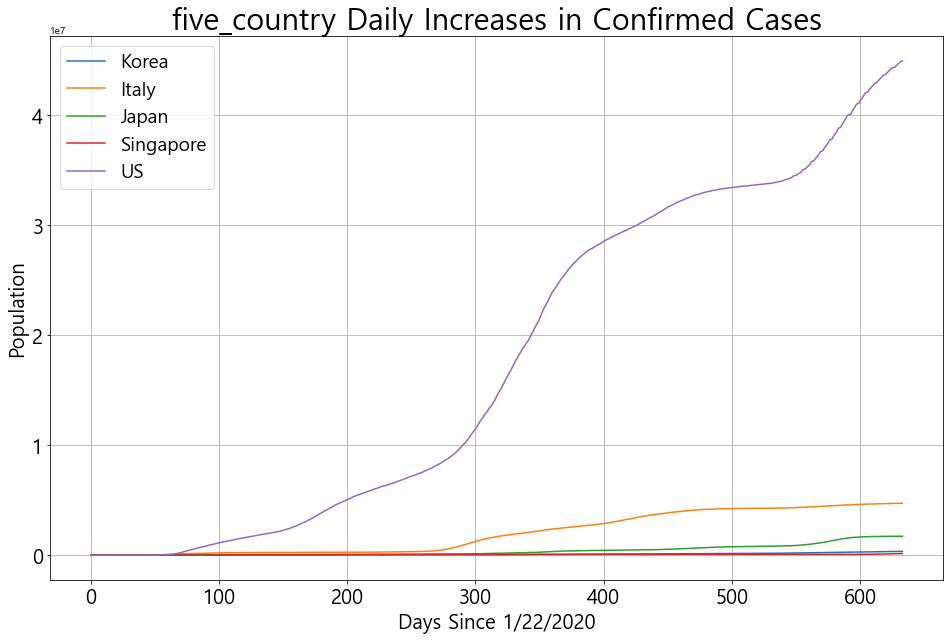

In [38]:
# 5개 국가 누적 확진자 수 전체 비교
plt.figure(figsize=(16, 10))
plt.plot(x_kor,y_kor, label='Korea')
plt.plot(x_ital, y_ital, label='Italy')
plt.plot(x_jap,y_jap, label='Japan')
plt.plot(x_sing,y_sing, label='Singapore')
plt.plot(x_us,y_us, label='US')
plt.legend(loc=2, fontsize=19)
plt.title('five_country Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

```
미국이 압도적으로 많음.
-> 미국을 제외한 4개 국가만 다시 비교해보기
```

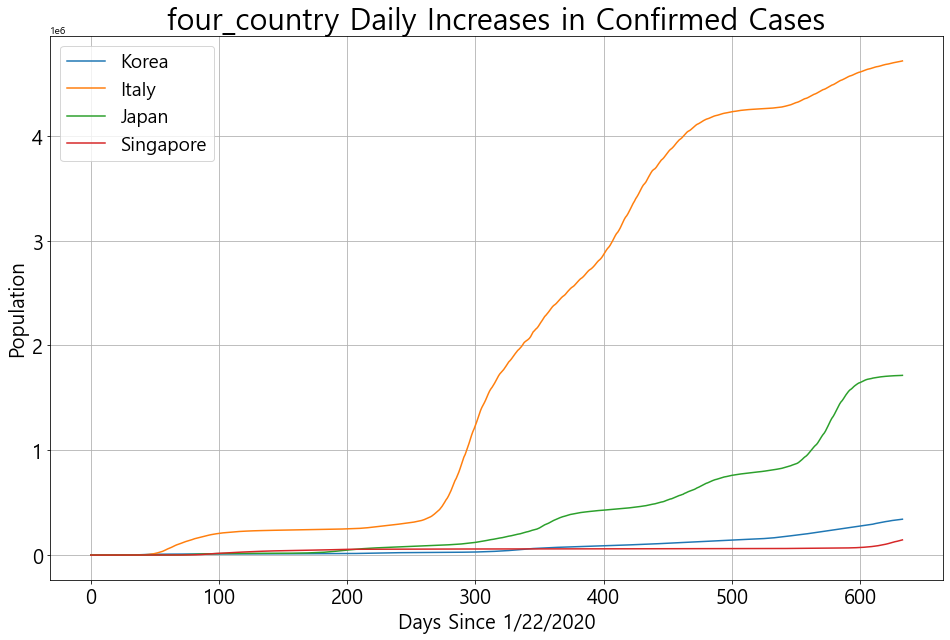

In [39]:
# 미국 제외 4개 국가 누적 확진자 수 전체 비교
plt.figure(figsize=(16, 10))
plt.plot(x_kor,y_kor, label='Korea')
plt.plot(x_ital, y_ital, label='Italy')
plt.plot(x_jap,y_jap, label='Japan')
plt.plot(x_sing,y_sing, label='Singapore')
plt.legend(loc=2, fontsize=19)
plt.title('four_country Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

```
미국을 제외하면, 이탈리아가 제일 많은 확진자 수를 가지고 있다.
그러나, 국가 마다 인구 수가 다르기에, 확진자 수만 보고 코로나 방역을 얘기하기엔 무리가 있다.
-> 비율로 비교하는 것 필요
```

# 4. 분석을 위한 데이터 수정 및 재가공
- 나라별 인구 수
- 나라별 사망자 수
- 나라별 백신 접종자 수(총 접종 회분 기준)

## 4-1. 나라별 인구수 
    - 인구수 대비 확진자 수 

In [40]:
five_country

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,Confirmed,Deaths
0,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,...,331519,332816,334163,335742,337679,339361,340978,342396,325804,2544
1,Italy,41.871940,12.567380,0,0,0,0,0,0,0,...,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464,4689341,131157
2,Japan,36.204824,138.252924,2,2,2,2,4,4,7,...,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059,1708634,17833
3,Singapore,1.283300,103.833300,0,1,3,3,4,5,7,...,124157,126966,129229,132205,135395,138327,141772,145120,113381,133
4,US,40.000000,-100.000000,1,1,2,2,5,5,5,...,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423,44058827,708110


In [41]:
five_country_syn = five_country[['Country/Region', 'Confirmed', 'Deaths']]
five_country_syn

,Country/Region,Confirmed,Deaths
0,"Korea, South",325804,2544
1,Italy,4689341,131157
2,Japan,1708634,17833
3,Singapore,113381,133
4,US,44058827,708110


In [42]:
# 인구 수 컬럼 추가
five_country_syn['population'] = [51821669, 60367471, 126050766, 5896684, 332915074]
five_country_syn

,Country/Region,Confirmed,Deaths,population
0,"Korea, South",325804,2544,51821669
1,Italy,4689341,131157,60367471
2,Japan,1708634,17833,126050766
3,Singapore,113381,133,5896684
4,US,44058827,708110,332915074


In [43]:
# 인구 수 대비 확진자 수 => 확진자율 컬럼 추가
five_country_syn['popul_ratio'] = five_country_syn['Confirmed'] / five_country_syn['population'] * 100

In [44]:
five_country_syn

,Country/Region,Confirmed,Deaths,population,popul_ratio
0,"Korea, South",325804,2544,51821669,0.628702
1,Italy,4689341,131157,60367471,7.767993
2,Japan,1708634,17833,126050766,1.355513
3,Singapore,113381,133,5896684,1.922793
4,US,44058827,708110,332915074,13.234254


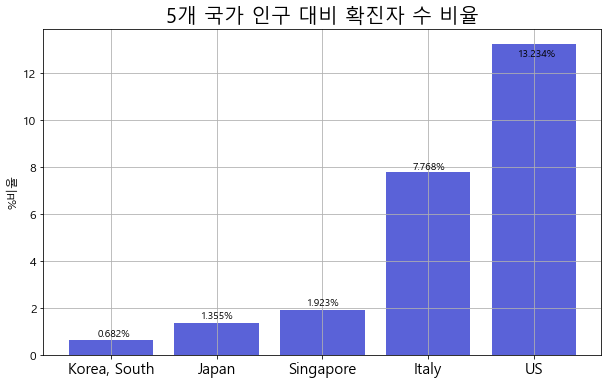

In [68]:
# 인구 대비 확진자 수 비율로 비교
five_country_sort = five_country_syn.sort_values('popul_ratio')
plt.figure(figsize=(10, 6))
plt.bar(five_country_sort['Country/Region'], five_country_sort['popul_ratio'],color='#5A62D8')
plt.text(-0.125, 0.8, '0.682%')
plt.text(0.85, 1.55, '1.355%')
plt.text(1.85, 2.1, '1.923%')
plt.text(2.85, 7.9, '7.768%')
plt.text(3.85, 12.7, '13.234%')
plt.title('5개 국가 인구 대비 확진자 수 비율', size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.ylabel('%비율', size=12)
plt.grid()
plt.show()

## 4-2. 나라별 사망자 수
    - 확진자 수 대비 사망자 수

In [69]:
# 확진자 수 대비 사망자 수 비율 컬럼 추가
five_country_syn['death_ratio'] = five_country_syn['Deaths'] / five_country_syn['Confirmed'] * 100

In [117]:
five_country_syn

,Country/Region,Confirmed,Deaths,population,popul_ratio,death_ratio,vaccine,vaccin_ratio,recovery_ratio,incident_ratio,GDP
0,"Korea, South",325804,2544,51821669,0.628702,0.780838,68909000,132.973332,90.4,6651,1586786
1,Italy,4689341,131157,60367471,7.767993,2.796918,86285740,142.934164,95.5,77941,1848222
2,Japan,1708634,17833,126050766,1.355513,1.043699,174631850,138.540888,98.4,13558,4910580
3,Singapore,113381,133,5896684,1.922793,0.117304,9639518,163.473539,81.0,24233,337451
4,US,44058827,708110,332915074,13.234254,1.607192,401819240,120.697220,77.2,138182,20807269


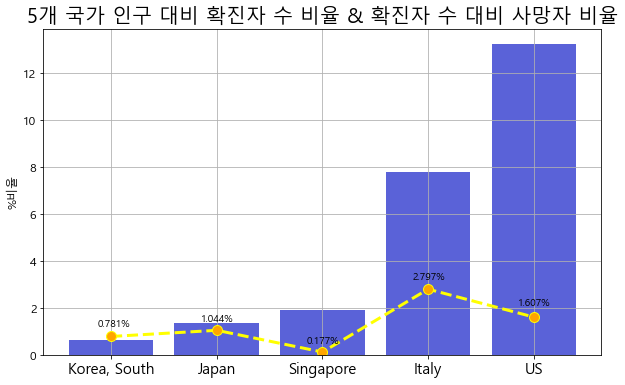

In [85]:
# 위 그래프에 확진자 수 대비 사망자 수 비율 추가
five_country_sort = five_country_syn.sort_values('popul_ratio')
plt.figure(figsize=(10,6))

plt.plot(five_country_sort['Country/Region'], five_country_sort['death_ratio'],
        ls='dashed', lw=3, color='yellow',marker='o',markerfacecolor='orange',markersize=10,)
plt.text(-0.125, 1.2, '0.781%')
plt.text(1.85, 0.5, '0.177%')
plt.text(2.85, 3.2, '2.797%')
plt.text(0.85, 1.4, '1.044%')
plt.text(3.85, 2.1, '1.607%')

plt.bar(five_country_sort['Country/Region'], five_country_sort['popul_ratio'], color='#5A62D8')

plt.title('5개 국가 인구 대비 확진자 수 비율 & 확진자 수 대비 사망자 비율', size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.ylabel('%비율', size=12)
plt.grid()
plt.show()

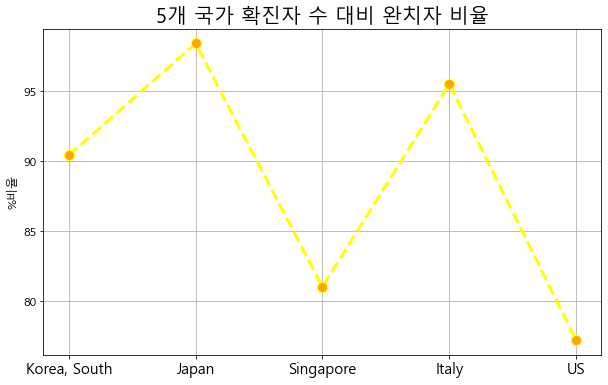

In [215]:


five_country_sort = five_country_syn.sort_values('popul_ratio')
plt.figure(figsize=(10,6))

plt.plot(five_country_sort['Country/Region'], five_country_sort['recovery_ratio'],
        ls='dashed', lw=3, color='yellow',marker='o',markerfacecolor='orange',markersize=10,)

plt.title('5개 국가 확진자 수 대비 완치자 비율', size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.ylabel('%비율', size=12)
plt.grid()
plt.show()

In [105]:
# gdp 컬럼 추가(백만달러 기준)
five_country_syn['GDP'] = [1586786,1848222,4910580,337451,20807269]

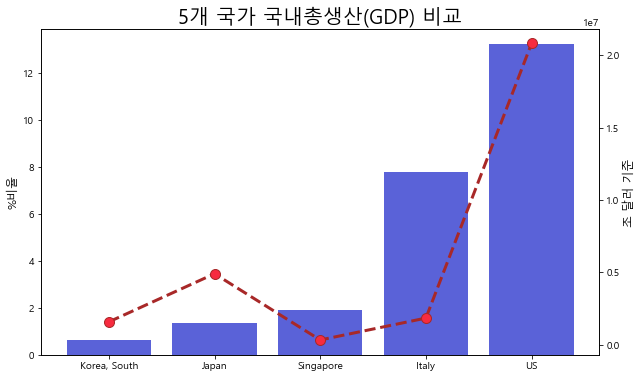

In [116]:
# # 인구 대비 확진자 수 비율 + GDP 비교
five_country_sort = five_country_syn.sort_values('popul_ratio')

fig = plt.figure(figsize=(10, 6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성

plt.title('5개 국가 국내총생산(GDP) 비교', size=20)

ax1.bar(five_country_sort['Country/Region'], five_country_sort['popul_ratio'],color='#5A62D8')
ax1.set_ylabel('%비율', size=12)

ax2 = ax1.twinx()
ax2.plot(five_country_sort['Country/Region'], five_country_sort['GDP'],
ls='dashed', lw=3, color='#A82828',marker='o',markerfacecolor='#F72B3F',markersize=10)
ax2.set_ylabel('조 달러 기준', size=12)

plt.show()

## 4-3. 나라별 백신 접종자 수(총 접종 회분 기준)
    - 인구 수 대비 백신 접종자 수
    - https://www.bbc.com/korean/features-56066227

In [100]:
# 접종자 수 컬럼 추가
five_country_syn['vaccine'] = [68909000,86285740,174631850,9639518,401819240]
five_country_syn

,Country/Region,Confirmed,Deaths,population,popul_ratio,death_ratio,vaccine
0,"Korea, South",325804,2544,51821669,0.628702,0.780838,68909000
1,Italy,4689341,131157,60367471,7.767993,2.796918,86285740
2,Japan,1708634,17833,126050766,1.355513,1.043699,174631850
3,Singapore,113381,133,5896684,1.922793,0.117304,9639518
4,US,44058827,708110,332915074,13.234254,1.607192,401819240


In [101]:
# 인구 수 대비 접종자 수 비율 컬럼 추가
five_country_syn['vaccin_ratio'] = five_country_syn['vaccine'] / five_country_syn['population'] * 100

In [102]:
five_country_syn

,Country/Region,Confirmed,Deaths,population,popul_ratio,death_ratio,vaccine,vaccin_ratio
0,"Korea, South",325804,2544,51821669,0.628702,0.780838,68909000,132.973332
1,Italy,4689341,131157,60367471,7.767993,2.796918,86285740,142.934164
2,Japan,1708634,17833,126050766,1.355513,1.043699,174631850,138.540888
3,Singapore,113381,133,5896684,1.922793,0.117304,9639518,163.473539
4,US,44058827,708110,332915074,13.234254,1.607192,401819240,120.697220


In [103]:
# 완치율 컬럼 추가
five_country_syn['recovery_ratio'] = [90.4, 95.5, 98.4, 81.0, 77.2]

In [104]:
# 발생률(100만명 당 발생률=확진자/인구수*1,000,000) 컬럼 추가
five_country_syn['incident_ratio']= [6651, 77941, 13558, 24233, 138182]

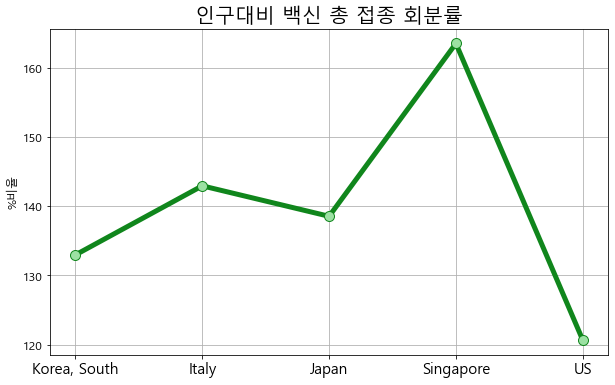

In [132]:
# # 백신 접종률 
plt.figure(figsize=(10, 6))
plt.plot(five_country_syn['Country/Region'], five_country_syn['vaccin_ratio'],lw=5,color='#10861C',marker='o',markerfacecolor='#9CE1A3',markersize=10)
# plt.text(-0.125, 0.8, '0.682%')
# plt.text(0.85, 1.55, '1.355%')
# plt.text(1.85, 2.1, '1.923%')
# plt.text(2.85, 7.9, '7.768%')
# plt.text(3.85, 12.7, '13.234%')
plt.title('인구대비 백신 총 접종 회분률', size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.ylabel('%비율', size=12)
plt.grid()
plt.show()

In [146]:
# count = 0
# flag = True

# while flag:
#     for i in five_country_daily.columns:
#         count += 1
#         if i =='1/01/21':
#             flag = False
# print(count)

five_country_new_daily = five_country_daily.iloc[:, 345:]
five_country_new_daily


,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,62593,63244,64264,64979,65818,66686,67358,67999,68664,69114,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
1,2129376,2141201,2155446,2166244,2181619,2201945,2220361,2237890,2257866,2276491,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
2,239068,242097,245293,248625,253571,259521,267084,274947,282737,288818,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
3,58629,58662,58697,58721,58749,58780,58813,58836,58865,58907,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
4,20318085,20614548,20817609,21000263,21231487,21487814,21776472,22079480,22338581,22551280,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


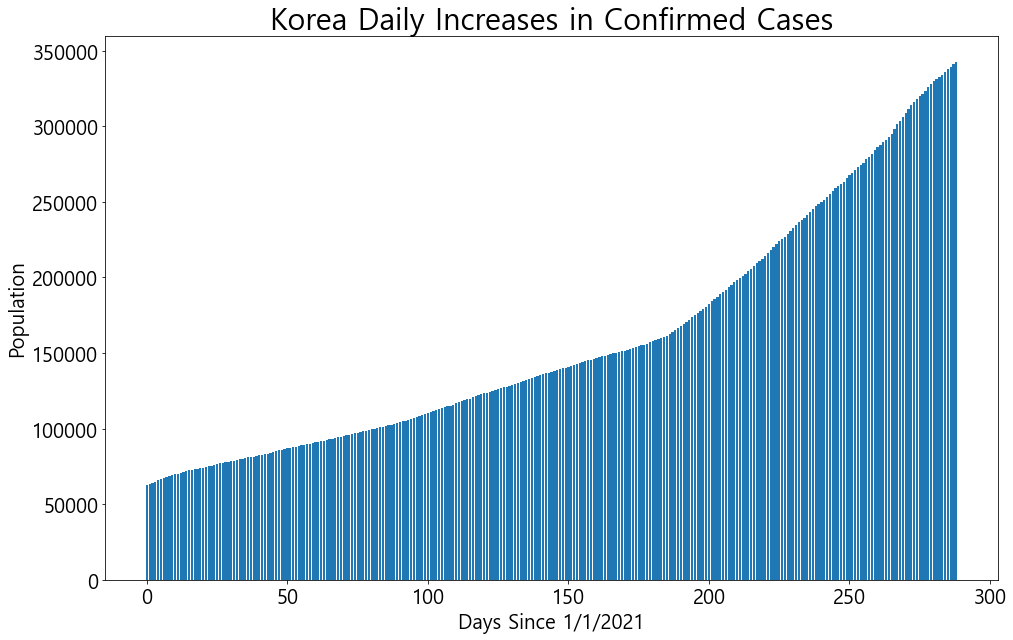

In [149]:
# korea daily graph_ x, y

x_kor = []
for i in range(len(five_country_new_daily.columns)): 
    x_kor.append(i)
y_kor = []
for i in range(len(x_kor)):
    y_kor.append(five_country_new_daily.iloc[0, i])
len(x_kor)
len(y_kor)

# 한국 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_kor,y_kor)
plt.title('Korea Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/1/2021', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

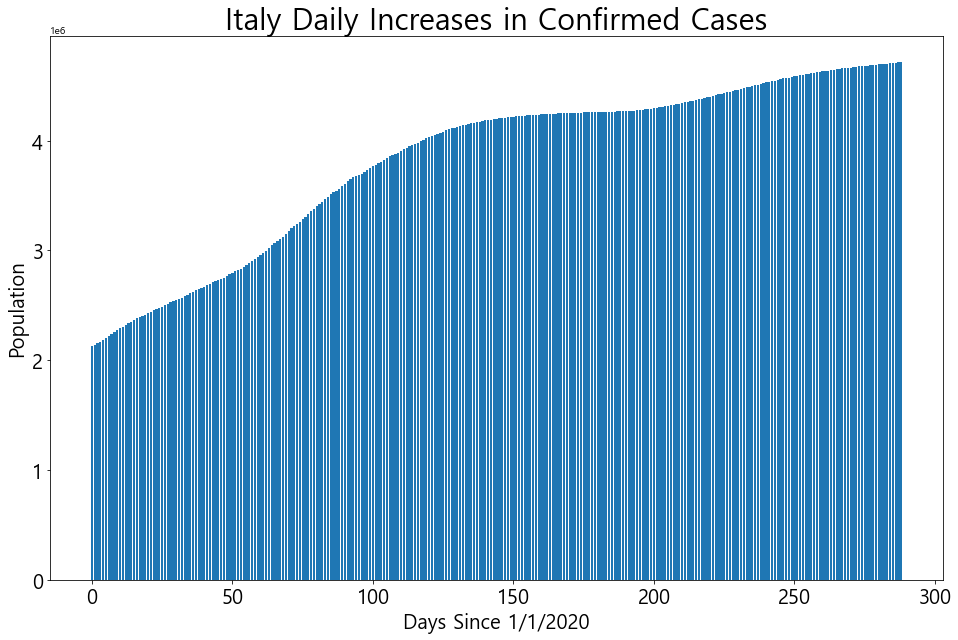

In [150]:
# Italy daily graph_ x, y

x_ital = []
for i in range(len(five_country_new_daily.columns)): 
    x_ital.append(i)
y_ital = []
for i in range(len(x_ital)):
    y_ital.append(five_country_new_daily.iloc[1, i])
len(x_ital)
len(y_ital)

# 이탈리아 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_ital, y_ital)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/1/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

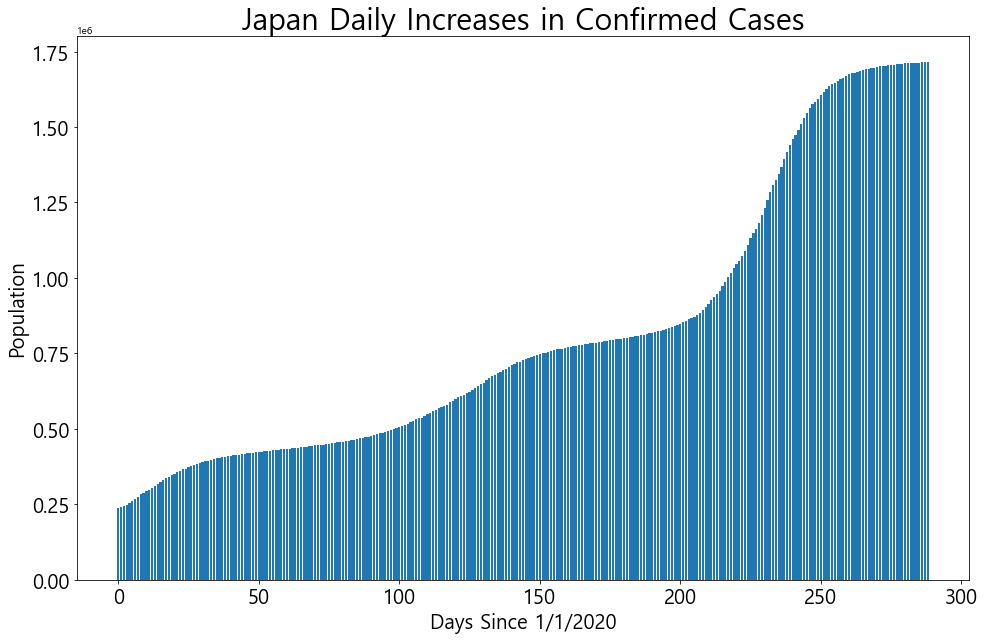

In [151]:
# Japan daily graph_ x, y

x_jap = []
for i in range(len(five_country_new_daily.columns)): 
    x_jap.append(i)
y_jap = []
for i in range(len(x_jap)):
    y_jap.append(five_country_new_daily.iloc[2, i])
len(x_jap)
len(y_jap)

# 일본 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_jap,y_jap)
plt.title('Japan Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/1/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

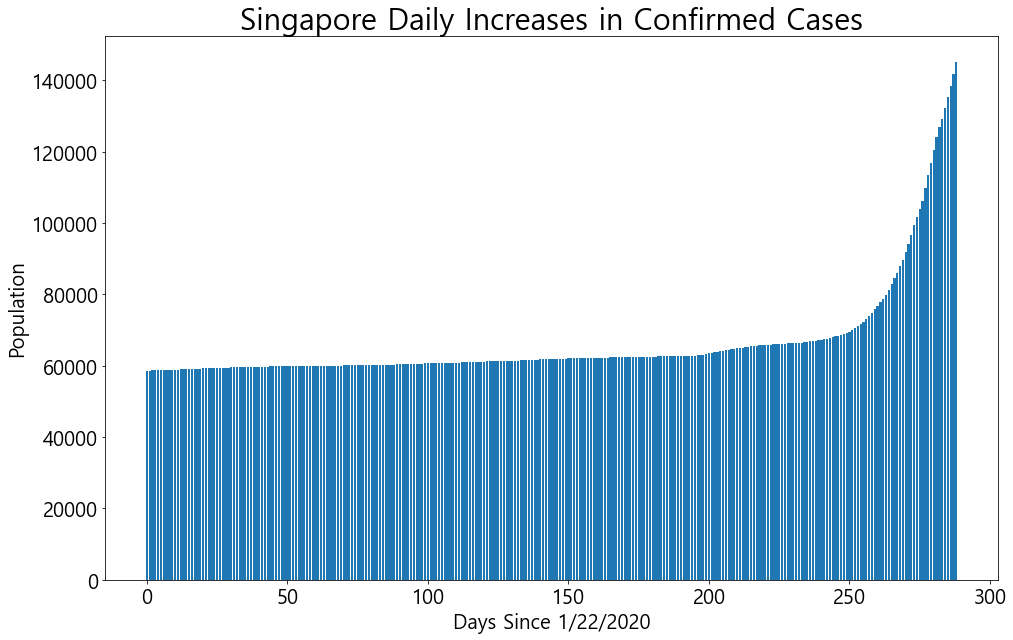

In [152]:
# Singapore daily graph_ x, y

x_sing = []
for i in range(len(five_country_new_daily.columns)): 
    x_sing.append(i)
y_sing = []
for i in range(len(x_sing)):
    y_sing.append(five_country_new_daily.iloc[3, i])
len(x_sing)
len(y_sing)

# 싱가포르 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_sing,y_sing)
plt.title('Singapore Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

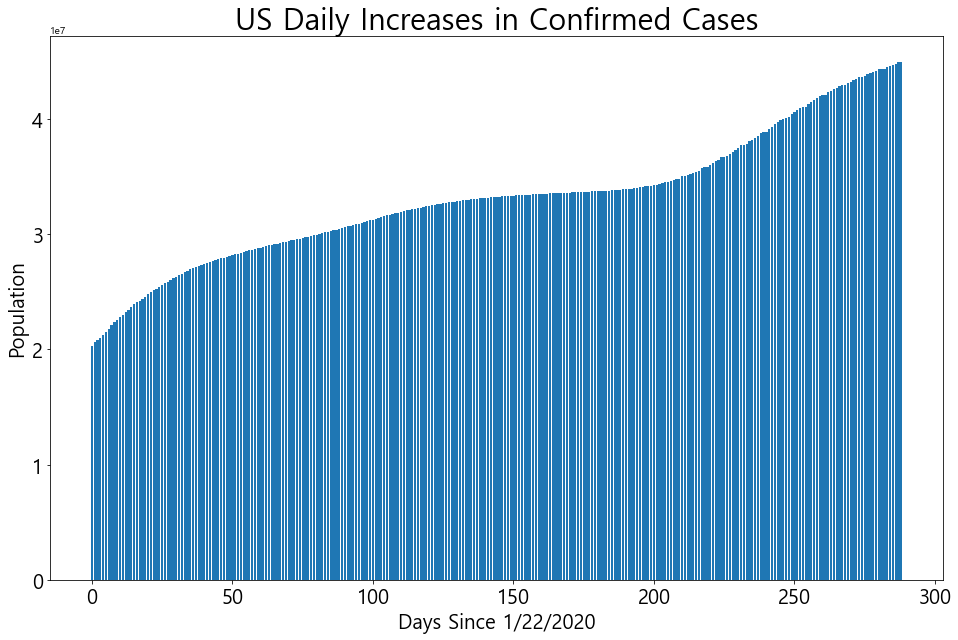

In [153]:
# US daily graph_ x, y

x_us = []
for i in range(len(five_country_new_daily.columns)): 
    x_us.append(i)
y_us = []
for i in range(len(x_us)):
    y_us.append(five_country_new_daily.iloc[4, i])
len(x_us)
len(y_us)

# 미국 일일 확진자 수 그래프(누적)
plt.figure(figsize=(16, 10))
plt.bar(x_us,y_us)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Population', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

-----------------------

# 5. 나라별 예측 그래프

- 목표 
    - 각 나라별 누적확진자 수의 3개월 예측 그래프를 그려본다.
    - 예측 그래프로 앞으로의 확진자 동향을 파악한다. 

In [159]:
five_country_daily

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21
0,1,1,2,2,3,4,4,4,4,11,...,327976,329925,331519,332816,334163,335742,337679,339361,340978,342396
1,0,0,0,0,0,0,0,0,0,2,...,4692274,4695291,4698038,4700316,4701832,4704318,4707087,4709753,4712482,4715464
2,2,2,2,2,4,4,7,7,11,15,...,1709603,1710426,1711207,1711756,1712127,1712740,1713471,1714060,1714201,1715059
3,0,1,3,3,4,5,7,7,10,13,...,116864,120454,124157,126966,129229,132205,135395,138327,141772,145120
4,1,1,2,2,5,5,5,6,6,8,...,44158910,44290052,44317989,44340183,44456385,44562693,44684150,44767906,44884868,44916423


In [174]:
df_kor = pd.DataFrame(five_country_daily.iloc[0, :])

df_kor.reset_index(inplace=True)

In [178]:
df_kor.rename(
    columns={'index':'ds',
    0:'y',    }, inplace=True 
)
df_kor

,ds,y
0,1/22/20,1
1,1/23/20,1
2,1/24/20,2
3,1/25/20,2
4,1/26/20,3
...,...,...
629,10/12/21,335742
630,10/13/21,337679
631,10/14/21,339361
632,10/15/21,340978


In [180]:
from fbprophet import Prophet

In [189]:
# 날짜를 fbprophet이 요구하는 형태로 변형
df_kor['ds'] = pd.to_datetime(df_kor['ds'], format='%m/%d/%y')
df_kor.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [191]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_kor)  #학습을 시키고

In [198]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
994,2022-10-12,771603.976950,514746.260530,1.036171e+06
995,2022-10-13,773325.400465,515101.294421,1.038606e+06
996,2022-10-14,774993.973070,515642.268285,1.041517e+06
997,2022-10-15,776559.292312,516180.020921,1.045157e+06
998,2022-10-16,777996.678895,516737.303201,1.047051e+06


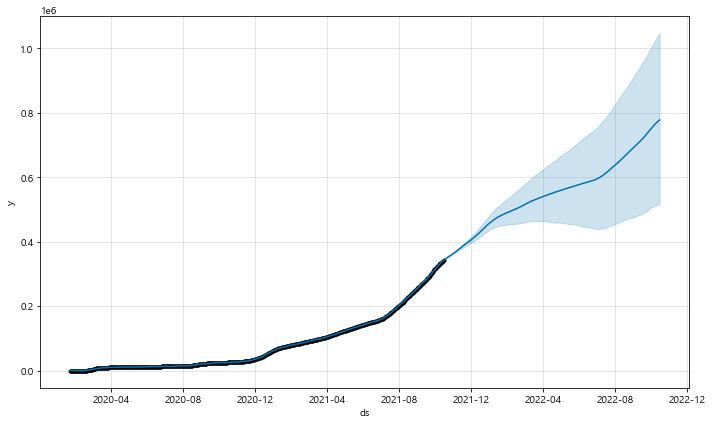

In [199]:
# 한국의 누적 확진자수 1년 예측 그래프
m.plot(forecast);

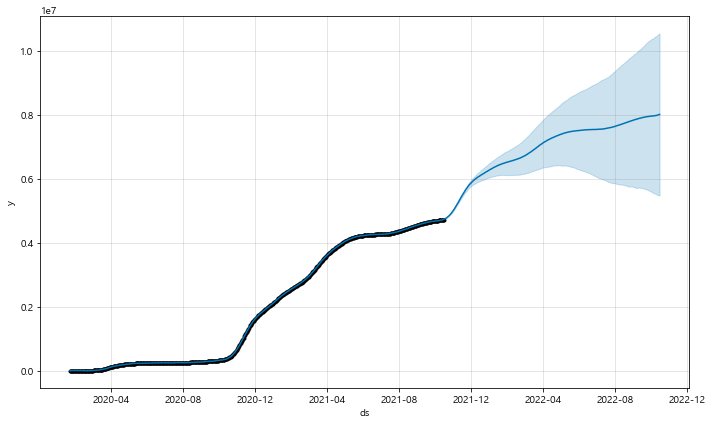

In [210]:
# 이탈리아의 누적 확진자수 1년 예측 그래프
df_ital = pd.DataFrame(five_country_daily.iloc[1, :])
df_ital.reset_index(inplace=True)
df_ital.rename(
    columns={'index':'ds',
    1:'y'}, inplace=True 
)

df_ital['ds'] = pd.to_datetime(df_ital['ds'], format='%m/%d/%y')
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_ital)  #학습을 시키고
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

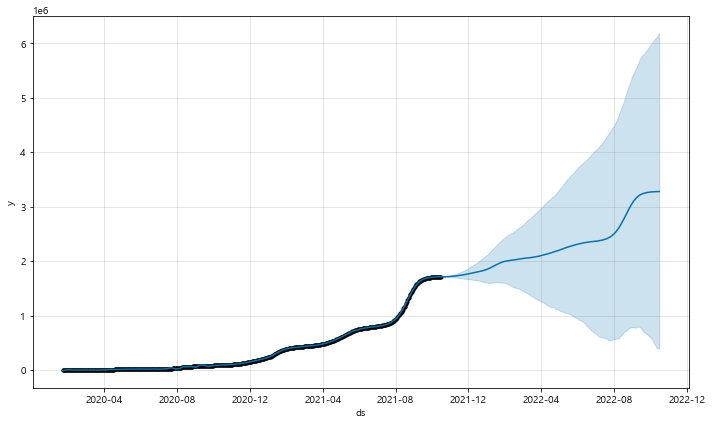

In [213]:
# 일본의 누적 확진자수 1년 예측 그래프
df_jap = pd.DataFrame(five_country_daily.iloc[2, :])
df_jap.reset_index(inplace=True)
df_jap.rename(
    columns={'index':'ds',
    2:'y'}, inplace=True 
)
df_jap['ds'] = pd.to_datetime(df_jap['ds'], format='%m/%d/%y')
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_jap)  #학습을 시키고
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

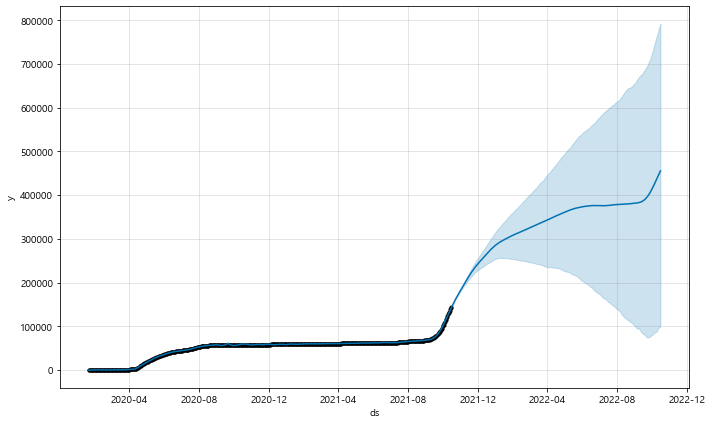

In [212]:
# 싱가포르의 누적 확진자수 1년 예측 그래프
df_sing = pd.DataFrame(five_country_daily.iloc[3, :])
df_sing.reset_index(inplace=True)
df_sing.rename(
    columns={'index':'ds',
    3:'y'}, inplace=True 
)

df_sing['ds'] = pd.to_datetime(df_sing['ds'], format='%m/%d/%y')
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_sing)  #학습을 시키고
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

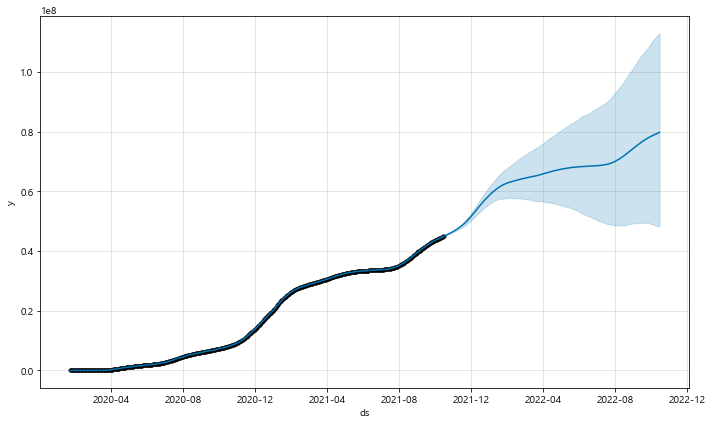

In [214]:
# 미국의 누적 확진자수 1년 예측 그래프
df_us = pd.DataFrame(five_country_daily.iloc[4, :])
df_us.reset_index(inplace=True)
df_us.rename(
    columns={'index':'ds',
    4:'y'}, inplace=True 
)

df_us['ds'] = pd.to_datetime(df_us['ds'], format='%m/%d/%y')
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df_us)  #학습을 시키고
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);

------------

# 6. 데이터 분석

```
3. 
- 5개 국가를 2020.1.22 이후로 하루 누적 확진자 수를 비교해보면, 
미국이 압도적으로 확진자 수가 많고, 나머지 4개 국가는 비슷한 양상을 보인다.
미국의 결과값이 4개 나라의 결과값과 차이가 크므로, 스케일이 비슷한 4개 국가를 비교해 봤을 땐,
이탈리아가 1등 싱가포르가 마지막으로, 확진자 수로 비교해봤을 땐, 싱가포르가 안전한 나라라고 판단할 수 있다.
- 그러나, 각 나라별 인구 수가 상이하므로, 인구수 대비 비교를 해야 더 정확한 분석을 할 수 있다.

4. 
- 인구 대비 확진자 수 비교
    인구 대비 확진자 수 비율을 비교해 봤을 때, 3에서 단순히 확진자 수로만 비교했던 결과와 다르게 나왔다.
    한국이 5위로, 앞선 데이터보다 한 단계 더 안전하다는 결과가 나왔다.
    싱가포르는 3위로, 2단계 올라간 결과가 나왔다.

- 확진자 수 대비 사망자 수 비교
    - 싱가포르가 가장 낮게 나왔고, 이탈리아가 가장 높게 나왔다.

- 인구 수 대비 백신 접종자 수 비교
    - 접종을 가장 많이 한 곳은 싱가포르로, 앞선 데이터인 확진자수 대비 사망자수가 가장 낮은 이유가 될 수 있다.
    - 백신 접종비율은 5개 나라 모두 120% 넘는 수치를 보이고 있다.
    - 일본과 이탈리아는 인구 수 대비 백신접종률이 비슷한데, 사망자 비율에선 2배의 차이를 보이고 있다.
    => 여기서, 이탈리아보다 일본이 더 방역을 선제적으로 잘 하고 있다 판단할 수 있다.
```

